#### 1. Setup and Load Data

1.1 install Dependencies and setup

In [1]:
# !pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

1.2 Remove Dodgy images

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir)

['Happy people', 'sad people']

In [8]:
image_exts = ['jpeg','jpg','bmp','png']

In [9]:
for image_class in os.listdir(data_dir):
  print(image_class)

Happy people
sad people


In [10]:
img = cv2.imread(os.path.join('data','happy people','jumping.jpg'))

In [11]:
img.shape

(800, 1528, 3)

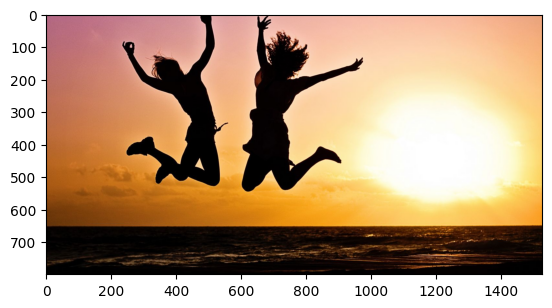

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [13]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    image_path = os.path.join(data_dir, image_class,image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in extension list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)


1.3 Load Data

In [14]:
# tf.data.Dataset??

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
# Building our data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 165 files belonging to 2 classes.


In [17]:
# Allow us to access out data pipeline  / loop throught it
data_iterator = data.as_numpy_iterator()

In [18]:
# accessing data pipeline it-self / grabing our batch back
# get another batch from iterator
batch = data_iterator.next()

In [19]:
# images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [20]:
# class 1 = sad people
# class 0 = happy people
batch[1]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

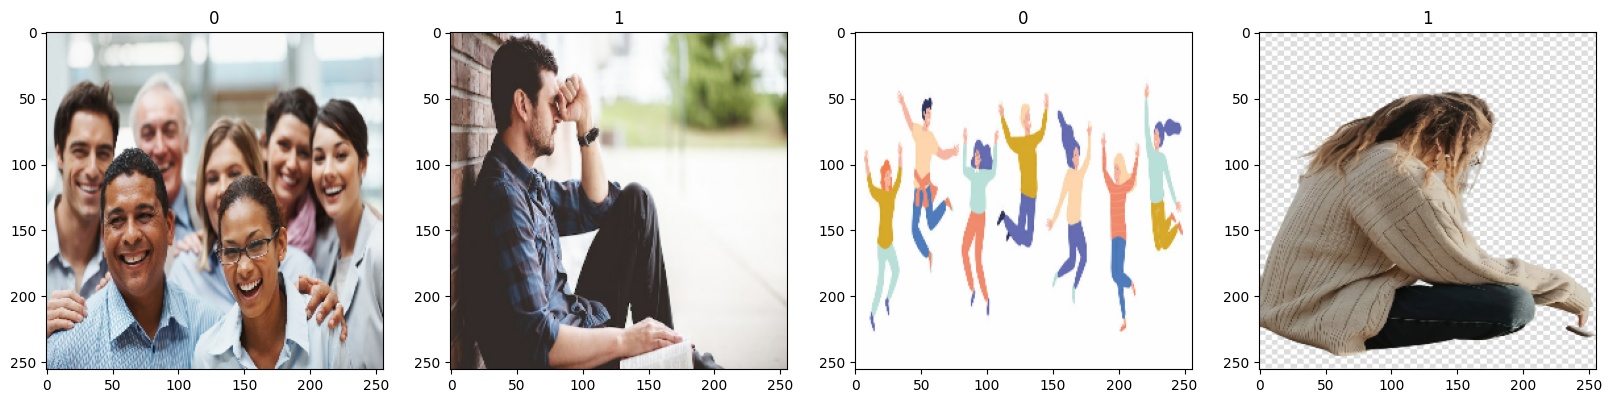

In [21]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [22]:
scaled = batch[0] / 255

In [23]:
scaled.max()

1.0

#### 2. Preprocess Data

2.1 Scale Data

In [24]:
data = data.map(lambda X,y : (X/255, y))

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

In [27]:
batch[0].min()

0.0

In [28]:
data.as_numpy_iterator().next()

(array([[[[0.99215686, 0.99215686, 0.99215686],
          [0.98976713, 0.98976713, 0.98976713],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          ...,
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686],
          [0.99215686, 0.99215686, 0.99215686]],
 
         ...,
 
         [[0.99215686, 0.99215686, 0.99215686],
          [0.99215

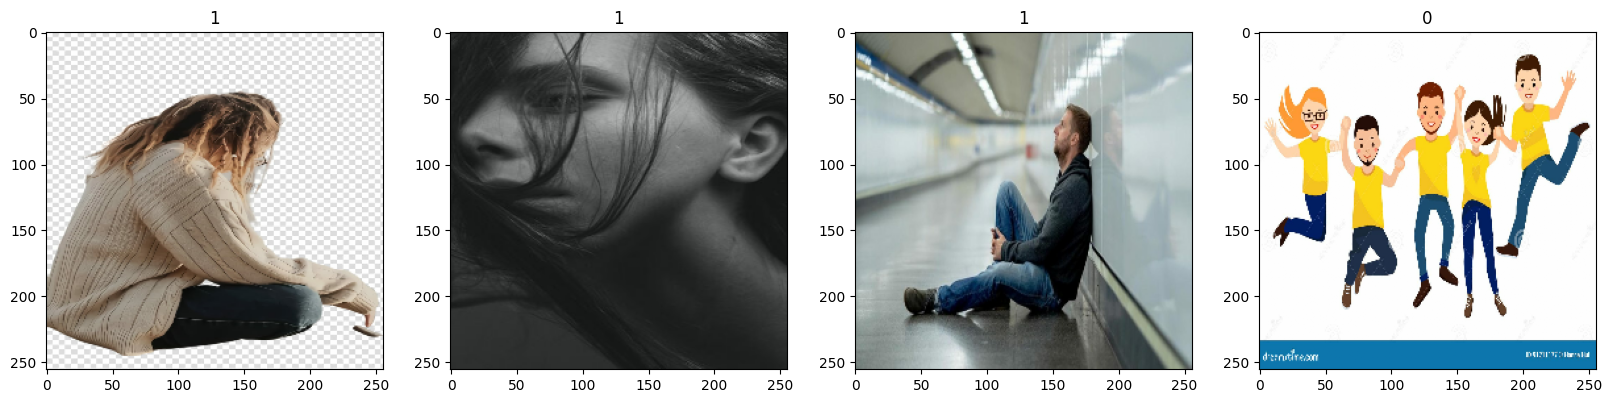

In [29]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [30]:
len(data)

6

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [32]:
train_size+val_size+test_size

6

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(val)

1

#### 3. Deep Model

3.1 Build Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(16,(3,3),1, activation='relu',input_shape=(256 ,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\Users\mistr\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

3.2 Train

In [40]:
logdir = 'logs'

In [41]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [42]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.4437 - loss: 2.1132 - val_accuracy: 0.5000 - val_loss: 1.2187
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.5958 - loss: 0.8891 - val_accuracy: 0.5000 - val_loss: 0.7229
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - accuracy: 0.5458 - loss: 0.7166 - val_accuracy: 0.7500 - val_loss: 0.5430
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.6323 - loss: 0.6008 - val_accuracy: 0.7812 - val_loss: 0.5366
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - accuracy: 0.7354 - loss: 0.5362 - val_accuracy: 0.9375 - val_loss: 0.4012
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 412ms/step - accuracy: 0.8667 - loss: 0.4419 - val_accuracy: 0.7812 - val_loss: 0.3797
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.8333 - loss: 0.3930 - val_accuracy: 0.9375 - val_loss: 0.2571
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 419ms/step - accuracy: 0.8229 - loss: 0.3459 - val_accuracy: 0.9688 - val_loss:

In [43]:
hist.history

{'accuracy': [0.453125,
  0.625,
  0.6015625,
  0.65625,
  0.734375,
  0.84375,
  0.8359375,
  0.84375,
  0.9609375,
  0.9375,
  0.890625,
  0.984375,
  0.9921875,
  0.96875,
  0.984375,
  0.9921875,
  1.0,
  0.9921875,
  1.0,
  1.0],
 'loss': [2.2129909992218018,
  0.7902204990386963,
  0.6836419105529785,
  0.5905699729919434,
  0.5282699465751648,
  0.4465458393096924,
  0.3855598568916321,
  0.33940574526786804,
  0.27198055386543274,
  0.18711484968662262,
  0.20584805309772491,
  0.12357231229543686,
  0.08618754148483276,
  0.07940170913934708,
  0.053840260952711105,
  0.047678254544734955,
  0.03472192957997322,
  0.022436371073126793,
  0.018376946449279785,
  0.018057821318507195],
 'val_accuracy': [0.5,
  0.5,
  0.75,
  0.78125,
  0.9375,
  0.78125,
  0.9375,
  0.96875,
  0.96875,
  0.84375,
  1.0,
  1.0,
  0.96875,
  1.0,
  1.0,
  0.96875,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [1.2187204360961914,
  0.7229434251785278,
  0.5429943799972534,
  0.5365683436393738,
  0.40

3.3 plot Performance

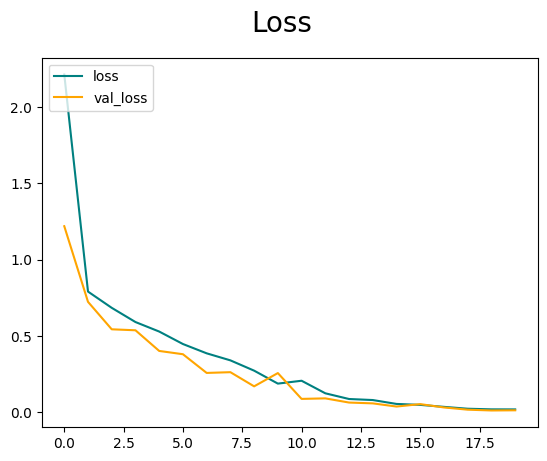

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

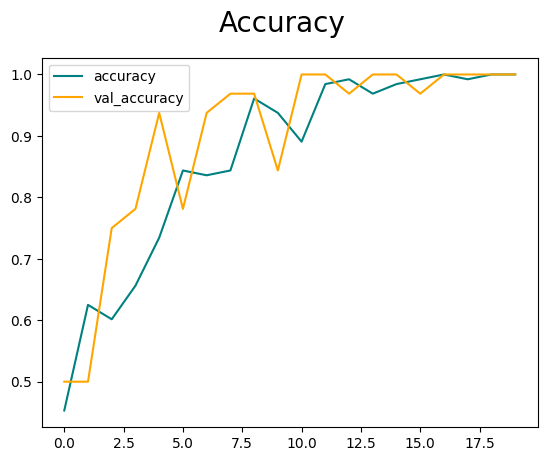

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### 4. Evaluate Performance

4.1 Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()  

In [51]:
len(test)

1

In [99]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [100]:
print(f'Precision : {pre.result().numpy()} | Recall : {re.result()} | Accuracy : {acc.result()}')

Precision : 1.0 | Recall : 1.0 | Accuracy : 1.0


4.2 Test

In [101]:
import cv2

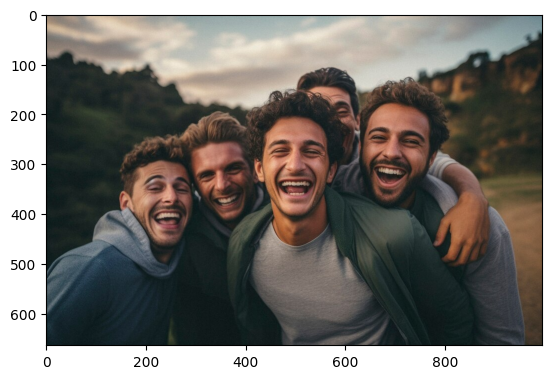

In [130]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

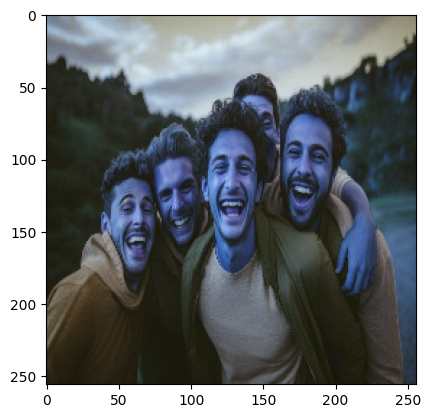

In [131]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [132]:
resize.shape

TensorShape([256, 256, 3])

In [133]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [134]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [135]:
yhat

array([[0.04058149]], dtype=float32)

In [136]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted Class is Happy')

Predicted Class is Happy


#### 5. Save The Model

5.1 save the Model

In [137]:
from tensorflow.keras.models import load_model

In [138]:
model.save(os.path.join('models', 'image_classifier.h5'))

In [139]:
os.path.join('models', 'image_classifier.h5')

'models\\image_classifier.h5'

In [140]:
new_model = load_model(os.path.join('models','image_classifier.h5'))

In [143]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [145]:
if yhat_new > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted Class is Happy')

Predicted Class is Happy
